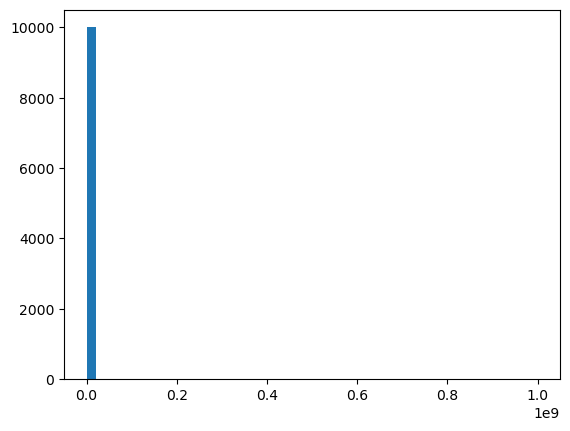

In [88]:
%matplotlib inline
import numpy as np

# criando valores aleatórios para representar rendas
incomes = np.random.normal(27000, 15000, 10000)
# adicionando um valor extremo
incomes = np.append(incomes, [1000000000])

# criando um histograma das rendas
import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

In [89]:
incomes.mean()

np.float64(126988.17390810406)

É importante avalirar o que está atrapalhando a analise, e o que é valido remover e o que não é

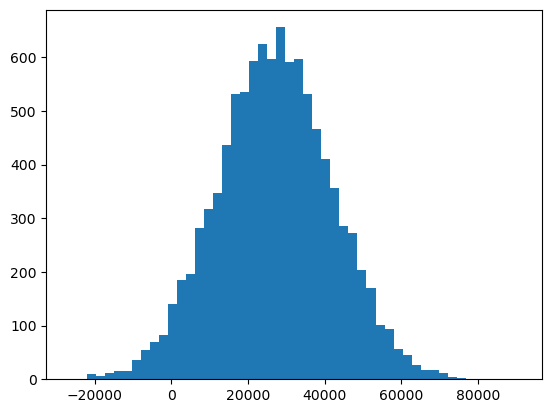

In [90]:
# criando uma função que remove os "foras da linha"
def reject_outliers(data):

    # u representa a mediana
    u = np.median(data)

    # s representa o desvio padrão
    s = np.std(data)

    # remove os valores que estão a mais de 2 desvios padrão da mediana
    filtered = [e for e in data if (u - 2*s < e < u + 2*s)]
    return filtered

filtered = reject_outliers(incomes)

# coloca um histograma das rendas filtradas
plt.hist(filtered, 50)
plt.show()

### Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standart deviation to identify outliers, and see what effect it has on the final results

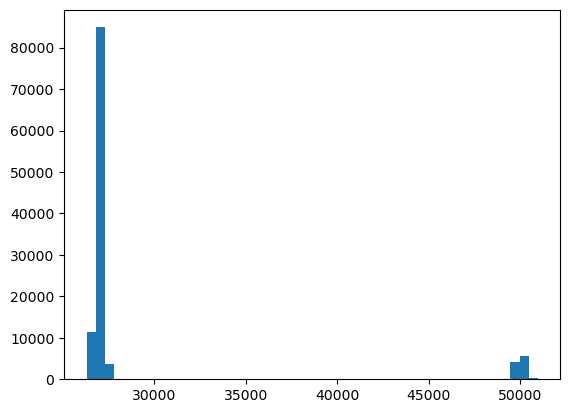

In [91]:
# criando valores aleatórios para representar rendas (usei poisson para não possuir números negativos)
incomes = np.random.poisson(lam=27000, size=100000)

# adicionando valores extremos
q = 10000
new_incomes = np.random.poisson(lam=50000, size=q)

# adicionando os outliers ao conjunto de dados
incomes = np.append(incomes, new_incomes)

# criando um histograma das rendas
plt.hist(incomes, 50)
plt.show()

In [92]:
# criando uma nova função para remover os "foras da linha"

# passando o peso do desvio padrao como parâmetro para testar
def reject_outliers(data, std_weight):

    # mediana
    u = np.median(data)
    # desvio padrão
    s = np.std(data)

    # filtrando se a distância do valor para a mediana é menor que o desvio padrao vezes o peso do desvio padrao
    filtered = [e for e in data if (u - std_weight*s < e < u + std_weight*s)]
    return filtered

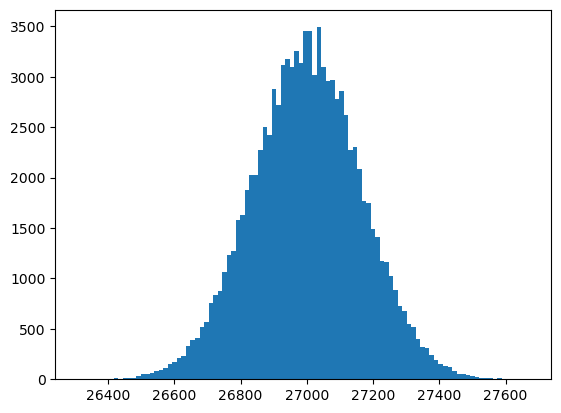

26999.27268
100000


In [93]:
weight = 3
# aplicando a função
filtered = reject_outliers(incomes, weight)

# criando histograma
plt.hist(filtered, 100)
plt.show()
print(np.mean(filtered))
print(len(filtered))

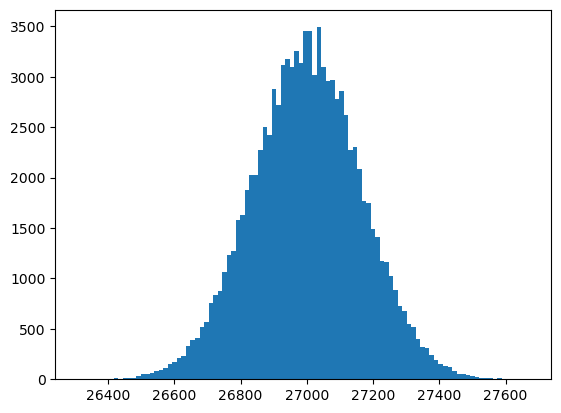

26999.27268
100000


In [94]:
# testando agora com um peso menor

weight = 1

filtered = reject_outliers(incomes, weight)

plt.hist(filtered, 100)
plt.show()

print(np.mean(filtered))
print(len(filtered))